# HYPOTHESIS TESTING ON NEWYORK FIRE DEPARTMENT DATA 

## Import Data 

In [7]:
import pandas as pd


# Read the Fire Department Data
fire_data = pd.read_csv('~/Desktop/Fire_Dept.csv')
#fire_data.head()
type(fire_data)
len(fire_data)


/Users/priyankaagrawal/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (1,14) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


1048575

In [8]:
fire_data.tail(5)

,IM_INCIDENT_KEY,FIRE_BOX,INCIDENT_TYPE_DESC,INCIDENT_DATE_TIME,ARRIVAL_DATE_TIME,UNITS_ONSCENE,LAST_UNIT_CLEARED_DATE_TIME,HIGHEST_LEVEL_DESC,TOTAL_INCIDENT_DURATION,ACTION_TAKEN1_DESC,...,ZIP_CODE,BOROUGH_DESC,FLOOR,CO_DETECTOR_PRESENT_DESC,FIRE_ORIGIN_BELOW_GRADE_FLAG,STORY_FIRE_ORIGIN_COUNT,FIRE_SPREAD_DESC,DETECTOR_PRESENCE_DESC,AES_PRESENCE_DESC,STANDPIPE_SYS_PRESENT_FLAG
1048570,58491584,3736,"600 - Good intent call, other",6/1/15 16:00,6/1/15 16:04,1.0,6/1/15 16:26,"1 - More than initial alarm, less than Signal 7-5",1559.0,52 - Forcible entry,...,10463,2 - Bronx,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1048571,58491589,792,"300 - Rescue, EMS incident, other",6/1/15 16:01,6/1/15 16:04,1.0,6/1/15 16:06,"1 - More than initial alarm, less than Signal 7-5",328.0,"00 - Action taken, other",...,11221,4 - Brooklyn,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1048572,58491595,3752,"300 - Rescue, EMS incident, other",6/1/15 16:02,6/1/15 16:08,1.0,6/1/15 16:21,"1 - More than initial alarm, less than Signal 7-5",1108.0,"00 - Action taken, other",...,10463,2 - Bronx,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1048573,58491600,6258,"651 - Smoke scare, odor of smoke",6/1/15 16:05,6/1/15 16:09,5.0,6/1/15 16:34,"1 - More than initial alarm, less than Signal 7-5",1739.0,"00 - Action taken, other",...,11360,5 - Queens,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1048574,58491606,1082,"300 - Rescue, EMS incident, other",6/1/15 16:07,6/1/15 16:11,1.0,6/1/15 16:48,"1 - More than initial alarm, less than Signal 7-5",2480.0,"00 - Action taken, other",...,10024,1 - Manhattan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### What is the ratio of average number of units that arrive to a scene of an incident classified as "111- Building Fire" to the no that arrive for "651 - Smoke scare- odor of smoke"  



In [9]:
building_fire = fire_data.loc[fire_data['INCIDENT_TYPE_DESC'] == "111 - Building fire" ]
#building_fire
smoke_scare = fire_data.loc[fire_data['INCIDENT_TYPE_DESC'] == "651 - Smoke scare, odor of smoke"]
#smoke_scare
fire_units_mean = building_fire['UNITS_ONSCENE'].mean()
#fire_units_mean
smoke_units_mean = smoke_scare['UNITS_ONSCENE'].mean()
#smoke_units_mean
print("Average units arriving for Building Fire:", fire_units_mean)
print("Average units arriving for Smoke Scare:", smoke_units_mean)
ratio = fire_units_mean/smoke_units_mean
ratio # Ans 
#building_fire
type(building_fire)
print("building fire incidents ", len(building_fire))
print("smoke scare incidents", len(smoke_scare))

Average units arriving for Building Fire: 10.676203051643192
Average units arriving for Smoke Scare: 4.163541932481724
building fire incidents  6905
smoke scare incidents 67021


# Independent Sample Hypothesis Testing -
## Large Sample - Z test
### There is no difference between the Average Number of Units arriving for Building Fire and Smoke Scare 


In [10]:
# Descriptive Statistics 

mean_building_fire_units = fire_units_mean
mean_smoke_scare_units = smoke_units_mean
stdev_building_fire_units = building_fire['UNITS_ONSCENE'].std()
stdev_smoke_scare_units = smoke_scare['UNITS_ONSCENE'].std()
len_building_fire = len(building_fire)
len_smoke_scare = len(smoke_scare)
print("sample sizes", len_building_fire, len_smoke_scare)
print(" means ", mean_building_fire_units, mean_smoke_scare_units)
print("stdev", stdev_building_fire_units, stdev_smoke_scare_units)

sample sizes 6905 67021
 means  10.676203051643192 4.163541932481724
stdev 6.782507172237214 1.5095501452693192


### 1. This is a two tailed test, as the average number of units that arrive on scene can be bigger or smaller than the estimated value 
### 2. This is a large sample hypothesis testing and we will perform z test to do the hypothesis testing 


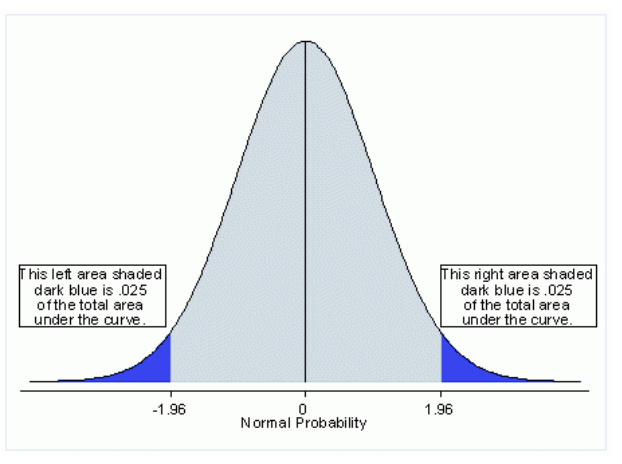

In [11]:
from IPython.display import Image
Image(filename='az.png', width = 400, height = 400)
# Two Tailed test will allot half of the aplha in either directions to test the statistical significance  

### Null hypothesis :        Ho : M1 - M2 = 0 
### Alternative Hypothesis : Ha : M1 - M2 !=0 


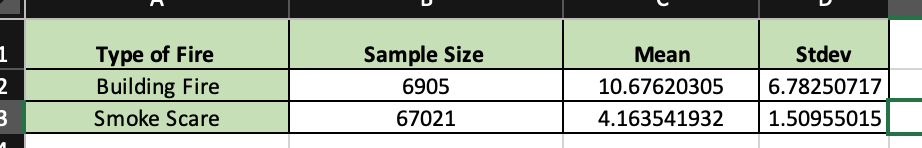

In [12]:
from IPython.display import Image
Image(filename='Desc_Stats.png', width = 600, height = 600)

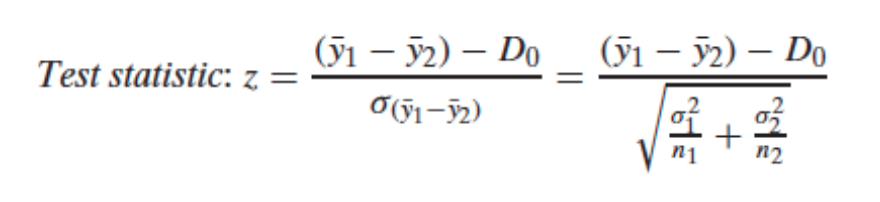

In [13]:
from IPython.display import Image
Image(filename='Formula.png', width = 600, height = 600)

# 1. Using Z_score

### 95% Confidence -  

In [14]:
import math
z_stat = (mean_building_fire_units- mean_smoke_scare_units)- 0/(math.sqrt(((stdev_building_fire_units**2)/len_building_fire)+((stdev_smoke_scare_units**2)/len_smoke_scare)))
print(z_stat)
# Hence, the value does not lie between +1.96 and -1.96.
# we will reject Null Hypothesis and perform Alternative Hypothesis 
# z_stat = 6.512661119161468

6.512661119161468


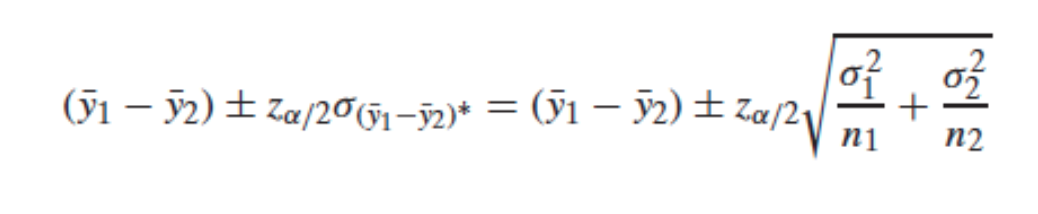

In [15]:
from IPython.display import Image
Image(filename='LargeSampleCI.png', width = 600, height = 600)

In [16]:
CI_95_pos = (mean_building_fire_units- mean_smoke_scare_units)+ 1.96*(math.sqrt(((stdev_building_fire_units**2)/len_building_fire)+((stdev_smoke_scare_units**2)/len_smoke_scare)))
CI_95_neg = (mean_building_fire_units- mean_smoke_scare_units)- 1.96*(math.sqrt(((stdev_building_fire_units**2)/len_building_fire)+((stdev_smoke_scare_units**2)/len_smoke_scare)))

print(CI_95_pos,CI_95_neg)
print(round(CI_95_pos),round(CI_95_neg))
# Number of Units arriving on scene for Building Fires are greater than for Smoke Scares 

6.673048384387741 6.352273853935195
7 6


# 2. Using Confidence Level 

### 90% Confidence 

In [17]:
CI_90_pos = (mean_building_fire_units- mean_smoke_scare_units)+ 1.64*(math.sqrt(((stdev_building_fire_units**2)/len_building_fire)+((stdev_smoke_scare_units**2)/len_smoke_scare)))
CI_90_neg = (mean_building_fire_units- mean_smoke_scare_units)- 1.64*(math.sqrt(((stdev_building_fire_units**2)/len_building_fire)+((stdev_smoke_scare_units**2)/len_smoke_scare)))
print(CI_90_pos,CI_90_neg)
print(round(CI_90_pos),round(CI_90_neg))
# Number of Units arriving on scene for Building Fires are greater than for Smoke Scares

6.646862708432431 6.378459529890504
7 6


### 99% Confidence 

In [18]:
CI_99_pos = (mean_building_fire_units- mean_smoke_scare_units)+ 2.57*(math.sqrt(((stdev_building_fire_units**2)/len_building_fire)+((stdev_smoke_scare_units**2)/len_smoke_scare)))
CI_99_neg = (mean_building_fire_units- mean_smoke_scare_units)- 2.57*(math.sqrt(((stdev_building_fire_units**2)/len_building_fire)+((stdev_smoke_scare_units**2)/len_smoke_scare)))
print(CI_99_pos,CI_99_neg)
print(round(CI_99_pos),round(CI_99_neg))

6.722964829177551 6.302357409145385
7 6


# 3. Using P value 

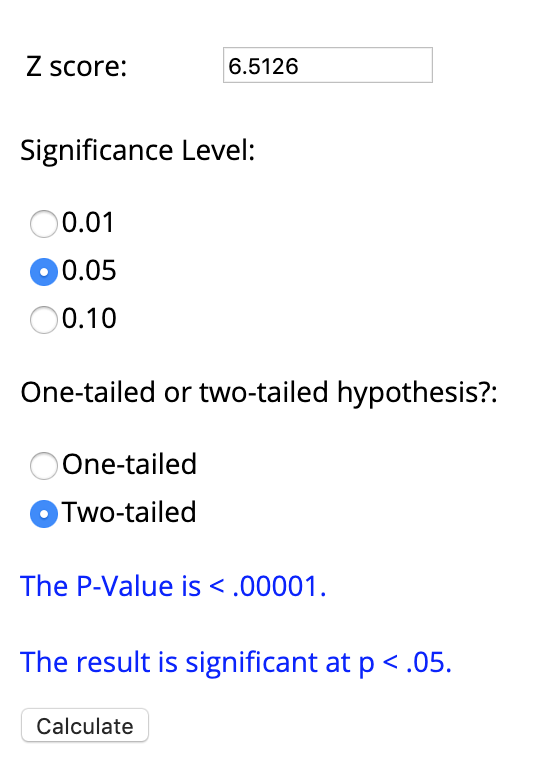

In [19]:
# If P < 0.05 : Reject Null Hypothesis 
# If p > 0.05 : Accept Null Hypothesis 

from IPython.display import Image
Image(filename='P_val.png', width = 250, height = 250)

### As the P value is less than 0.05, we will reject Null Hypothesis and Accept Alternative Hypothesis that the average number of Units arriving on Scene for Building Fires and Smoke Scares are not the same. 
### Also, that the number of units arriving for Building Fires are greater than Smoke Scares 

# T-Test for Small Sample Hypothesis Testing 

In [20]:
# Severe Weather or Natural Disaster Incidents 
fire_data.INCIDENT_TYPE_DESC.value_counts().tail(60)

521 - Water evacuation                                      31
714 - Central station, malicious false alarm                31
141 - Forest, woods or wildland fire                        30
355 - Confined space rescue                                 30
341 - Search for person on land                             30
361 - Swimming/recreational water areas rescue              29
357 - Extrication of victim(s) from machinery               28
712 - Direct tie to FD, malicious false alarm               27
800 - Severe weather or natural disaster, other             27
134 - Water vehicle fire                                    25
223 - Air or gas rupture of pressure or process vessel      25
480 - Attempted burning, illegal action, other              24
140 - Natural vegetation fire, other                        24
672 - Biological hazard investigation, none found           23
354 - Trench/below-grade rescue                             23
143 - Grass fire                                       

### 800 - Severe weather or natural disaster, other             27 
#### Here, Severe Weather or Natural Disaster Incidents were 27 




In [21]:
natural_disasters = fire_data.loc[fire_data['INCIDENT_TYPE_DESC'] == "800 - Severe weather or natural disaster, other" ]
natural_disasters.tail(5)

,IM_INCIDENT_KEY,FIRE_BOX,INCIDENT_TYPE_DESC,INCIDENT_DATE_TIME,ARRIVAL_DATE_TIME,UNITS_ONSCENE,LAST_UNIT_CLEARED_DATE_TIME,HIGHEST_LEVEL_DESC,TOTAL_INCIDENT_DURATION,ACTION_TAKEN1_DESC,...,ZIP_CODE,BOROUGH_DESC,FLOOR,CO_DETECTOR_PRESENT_DESC,FIRE_ORIGIN_BELOW_GRADE_FLAG,STORY_FIRE_ORIGIN_COUNT,FIRE_SPREAD_DESC,DETECTOR_PRESENCE_DESC,AES_PRESENCE_DESC,STANDPIPE_SYS_PRESENT_FLAG
645941,57351442,2350,"800 - Severe weather or natural disaster, other",7/15/14 19:16,7/15/14 19:22,1.0,7/15/14 19:39,"1 - More than initial alarm, less than Signal 7-5",1369.0,79 - Assess severe weather or natural disaster...,...,10451,2 - Bronx,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
853969,57914066,2185,"800 - Severe weather or natural disaster, other",1/7/15 18:46,1/7/15 18:50,1.0,1/7/15 19:00,"1 - More than initial alarm, less than Signal 7-5",886.0,86 - Investigate,...,10451,2 - Bronx,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
868651,57953694,8990,"800 - Severe weather or natural disaster, other",1/18/15 8:22,1/18/15 8:23,2.0,1/18/15 13:18,"1 - More than initial alarm, less than Signal 7-5",17768.0,81 - Incident command,...,10465,2 - Bronx,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
875901,57974725,8724,"800 - Severe weather or natural disaster, other",1/24/15 5:10,1/24/15 5:29,1.0,1/24/15 5:31,"1 - More than initial alarm, less than Signal 7-5",1275.0,45 - Remove hazard,...,99999,1 - Manhattan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1047307,58486984,4369,"800 - Severe weather or natural disaster, other",5/31/15 19:07,NaN,NaN,5/31/15 19:09,"1 - More than initial alarm, less than Signal 7-5",118.0,93 - Cancelled en route,...,10309,3 - Staten Island,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
len(natural_disasters)

27

In [23]:
mean_duration_nat_dis = natural_disasters['TOTAL_INCIDENT_DURATION'].mean()
print("incident duration | natural disasters", mean_duration_nat_dis/60, 'minutes')

incident duration | natural disasters 26.82962962962963 minutes


## Hypothesis Testing : 
### Null Hypothesis : Ho : Average Time taken to control Natural Disaster Incidents is 25 minutes = 1500 seconds 
### Alternative Hypothesis : Ha : Average Time taken to control Natural Disaster Incidents is not 25 minutes 



In [24]:
sample_mean = mean_duration_nat_dis
sample_stdev = natural_disasters['TOTAL_INCIDENT_DURATION'].std()
n = len(natural_disasters)
Mo = 1500
print("mean: " , sample_mean)
print("stdev: ", sample_stdev)
print("sample_size", n)


mean:  1609.7777777777778
stdev:  3266.075783817795
sample_size 27


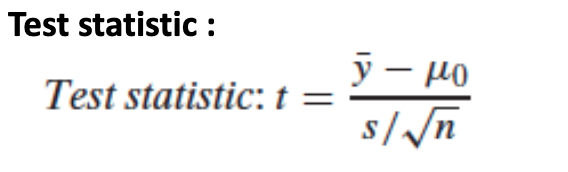

In [25]:
from IPython.display import Image
Image(filename='T_stat.png', width = 350, height = 350)

In [26]:
t_stat = (sample_mean-Mo)/ (sample_stdev/math.sqrt(n))
print("t_stat:", t_stat)


t_stat: 0.17465059101983554


## Approach 1. Using T- Statistic - Confidence Level = 95% 

In [27]:
# For Significance Level of 5%, alpha = 0.05, alpha/2 = 0.025 
degree_of_freedom = n-1 
print(degree_of_freedom)

26


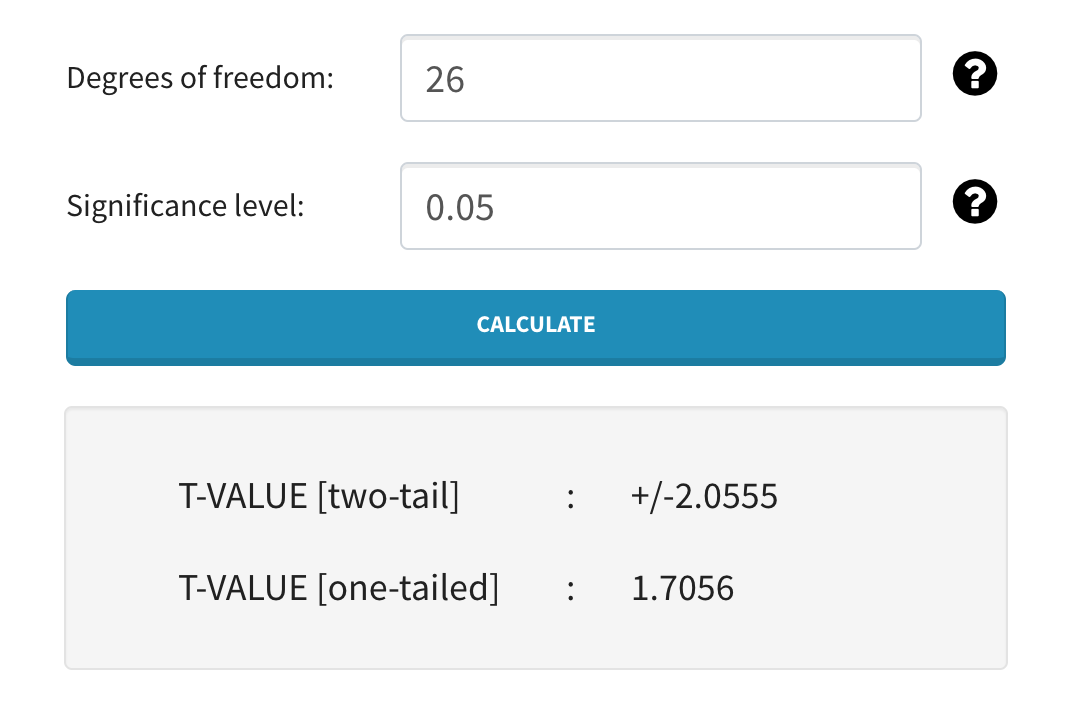

In [28]:
# Finding the t_value 
from IPython.display import Image
Image(filename='T_value.png', width = 350, height = 350)

#### value lies between -2.05 to +2.05, and t_stat is 0.17465059101983554, hence we cant reject Null Hypothesis 
### We will accept the Null Hypothesis 

## Approach 2: Using P value - 
### Confidence Level = 95% i.e. Significance Level = 5% - alpha = 0.05 



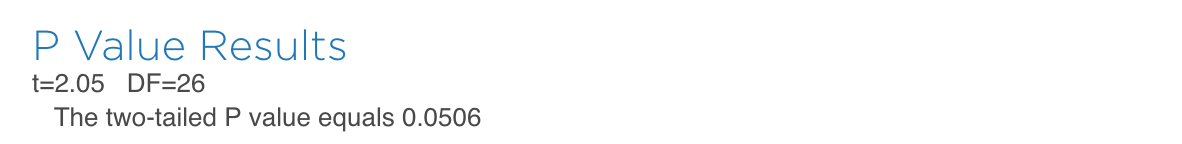

In [29]:
from IPython.display import Image
Image(filename='p_value.png', width = 550, height = 550)

In [30]:
# If P < 0.05 : Reject Null Hypothesis 
# If p > 0.05 : Accept Null Hypothesis 

### Hence, we will accept the Null Hypothesis, that the average time taken to control Natural Disaster Incidents is 25 minutes 


## Approach 3: Using Confidence Level  - 90% 
### value of alpha = 0.10 --> alpha/2 = 0.05

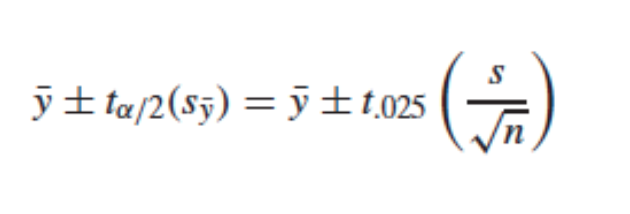

In [40]:

from IPython.display import Image
Image(filename='T_stat_formula.png', width = 350, height = 350)

In [41]:
# T value for 0.10 alpha and degree of freedom = 26 is --> -1.7 to +1.7, so taking half alpha in either direction:
t_score_pos = sample_mean + (1.7056 * (sample_stdev/(math.sqrt(n))))
t_score_neg = sample_mean - (1.7056 * (sample_stdev/(math.sqrt(n))))
print(t_score_neg/60, t_score_pos/60)

8.961861315339293 44.697397943919974


In [42]:
# Paired Sample Hypothesis Testing-
### When the same set of samples are taken to get the hypothesis data, and we need to do hypothesis based on them. 

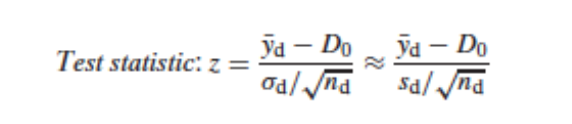

In [43]:

from IPython.display import Image
Image(filename='Paired_Hyp_Test.png', width = 350, height = 350)